In [3]:
#This example uses Python 3.12.4 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-09T01:24:14.069Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 10054}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11630, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
import pandas as pd 

pd.set_option('display.max_columns', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973738e+07,1.973738e+07,False,NaN,1,NaN,NaN,None,2024-08-09T01:23:00.000Z,61245.330503,4.550059e+10,9.5286,-0.554737,9.668267,-5.242873,6.266383,-11.950709,0.319269,1.208823e+12,56.4448,1.286152e+12,None,2024-08-09T01:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
1,1027,Ethereum,ETH,ethereum,9201,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202606e+08,1.202606e+08,True,NaN,2,NaN,NaN,None,2024-08-09T01:22:00.000Z,2663.095792,2.357255e+10,-2.9920,-0.554610,11.450257,-16.150982,-12.643778,-27.846509,-9.263324,3.202655e+11,14.9545,3.202655e+11,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
2,825,Tether USDt,USDT,tether,93816,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.154047e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-09T01:22:00.000Z,1.000285,7.373390e+10,1.7731,-0.004695,0.013654,0.114163,0.040987,0.035725,0.054260,1.154375e+11,5.3880,1.171014e+11,None,2024-08-09T01:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 21:24:50.987425
3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.663401e+08,5.817972e+08,True,NaN,4,NaN,NaN,None,2024-08-09T01:22:00.000Z,161.271554,5.309991e+09,-4.5269,-0.951417,9.435131,-3.026437,15.248243,-0.002655,9.391200,7.520739e+10,3.5102,9.382734e+10,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459367e+08,1.459367e+08,False,NaN,5,NaN,NaN,None,2024-08-09T01:22:00.000Z,513.873194,1.784897e+09,-4.9262,-0.257725,7.277434,-10.063515,-0.163123,-23.676261,-12.929882,7.499297e+10,3.5017,7.499297e+10,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
5,3408,USDC,USDC,usd-coin,21437,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.449714e+10,3.449714e+10,False,NaN,6,NaN,NaN,None,2024-08-09T01:22:00.000Z,0.999939,8.641517e+09,-5.2998,-0.011416,0.022345,-0.006251,0.004983,-0.006827,-0.013155,3.449501e+10,1.6100,3.449501e+10,None,2024-08-09T01:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-08 21:24:50.987425
6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-09T01:23:00.000Z,0.611284,3.190162e+09,-30.0754,-0.750991,4.183829,3.671913,40.948128,22.766482,20.953609,3.429571e+10,1.6007,6.112841e+10,None,2024-08-09T01:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
7,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.454558e+11,1.454558e+11,True,NaN,8,NaN,NaN,None,2024-08-09T01:23:00.000Z,0.106223,8.536477e+08,-15.6118,-0.933255,9.773739,-9.964042,-0.370781,-27.425277,-27.254503,1.545070e+10,0.7215,1.545070e+10,None,2024-08-09T01:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
8,11419,Toncoin,TON,toncoin,498,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518

In [9]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

    if not os.path.isfile(r'/Users/hosscomp/API.csv'):
        df.to_csv(r'/Users/hosscomp/API.csv', header='column_names')
    else: 
        df.to_csv(r'/Users/hosscomp/API.csv', mode='a', header=False)
        
  

In [11]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

df72 = pd.read_csv(r'/Users/hosscomp/API.csv')
df72

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.973738e+07,1.973738e+07,False,NaN,1,NaN,NaN,None,2024-08-09T01:23:00.000Z,61245.330503,4.550059e+10,9.5286,-0.554737,9.668267,-5.242873,6.266383,-11.950709,0.319269,1.208823e+12,56.4448,1.286152e+12,None,2024-08-09T01:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
1,1027,Ethereum,ETH,ethereum,9201,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202606e+08,1.202606e+08,True,NaN,2,NaN,NaN,None,2024-08-09T01:22:00.000Z,2663.095792,2.357255e+10,-2.9920,-0.554610,11.450257,-16.150982,-12.643778,-27.846509,-9.263324,3.202655e+11,14.9545,3.202655e+11,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
2,825,Tether USDt,USDT,tether,93816,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.154047e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-09T01:22:00.000Z,1.000285,7.373390e+10,1.7731,-0.004695,0.013654,0.114163,0.040987,0.035725,0.054260,1.154375e+11,5.3880,1.171014e+11,None,2024-08-09T01:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 21:24:50.987425
3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.663401e+08,5.817972e+08,True,NaN,4,NaN,NaN,None,2024-08-09T01:22:00.000Z,161.271554,5.309991e+09,-4.5269,-0.951417,9.435131,-3.026437,15.248243,-0.002655,9.391200,7.520739e+10,3.5102,9.382734e+10,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459367e+08,1.459367e+08,False,NaN,5,NaN,NaN,None,2024-08-09T01:22:00.000Z,513.873194,1.784897e+09,-4.9262,-0.257725,7.277434,-10.063515,-0.163123,-23.676261,-12.929882,7.499297e+10,3.5017,7.499297e+10,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1958,TRON,TRX,tron,1006,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.699548e+10,8.699548e+10,True,NaN,11,7.165966e+10,9.102985e+09,None,2024-08-09T01:32:00.000Z,0.127031,3.046381e+08,-3.7814,0.130304,1.836766,-0.837269,-2.208387,8.959147,0.084785,1.105111e+10,0.5152,1.105111e+10,None,2024-08-09T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:34:12.565023
11,5805,Avalanche,AVAX,avalanche,761,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.0,3.950900e+08,4.444364e+08,False,NaN,12,NaN,NaN,None,2024-08-09T01:32:00.000Z,22.623893,2.911183e+08,0.6255,-0.565070,12.717594,-11.080306,-14.280839,-31.767327,-33.118503,8.938474e+09,0.4167,1.619302e+10,None,2024-08-09T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:34:12.565023
12,5994,Shiba Inu,SHIB,shiba-inu,854,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,5.892704e+14,5.895191e+14,False,NaN,13,NaN,NaN,None,2024-08-09T01:32:00.000Z,0.000014,3.109023e+08,-1.1353,-0.932478,8.508070,-9.648547,-13.015258,-39.719740,-37.701609,8.324684e+09,0.3881,8.328197e+09,None,2024-08-09T01:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95a

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19737384.00000,19737384.00000,False,NaN,1,NaN,NaN,None,2024-08-09T01:23:00.000Z,61245.33050,45500589356.54089,9.52860,-0.55474,9.66827,-5.24287,6.26638,-11.95071,0.31927,1208822606341.11328,56.44480,1286151940559.26001,None,2024-08-09T01:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
1,1027,Ethereum,ETH,ethereum,9201,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120260616.31107,120260616.31107,True,NaN,2,NaN,NaN,None,2024-08-09T01:22:00.000Z,2663.09579,23572550450.52143,-2.99200,-0.55461,11.45026,-16.15098,-12.64378,-27.84651,-9.26332,320265541257.65594,14.95450,320265541257.65997,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
2,825,Tether USDt,USDT,tether,93816,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115404652458.26874,117068077122.62410,True,NaN,3,NaN,NaN,None,2024-08-09T01:22:00.000Z,1.00029,73733895723.15520,1.77310,-0.00470,0.01365,0.11416,0.04099,0.03572,0.05426,115437547778.29634,5.38800,117101446590.66000,None,2024-08-09T01:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 21:24:50.987425
3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466340078.04076,581797205.66014,True,NaN,4,NaN,NaN,None,2024-08-09T01:22:00.000Z,161.27155,5309991100.80923,-4.52690,-0.95142,9.43513,-3.02644,15.24824,-0.00266,9.39120,75207389138.63701,3.51020,93827339545.17000,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936717.55184,145936717.55184,False,NaN,5,NaN,NaN,None,2024-08-09T01:22:00.000Z,513.87319,1784897009.34847,-4.92620,-0.25772,7.27743,-10.06351,-0.16312,-23.67626,-12.92988,74992967179.14922,3.50170,74992967179.14999,None,2024-08-09T01:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:24:50.987425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1958,TRON,TRX,tron,1006,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,86995481989.91151,86995480685.54306,True,NaN,11,71659659264.00000,9102984802.07582,None,2024-08-09T01:32:00.000Z,0.12703,304638052.65442,-3.78140,0.13030,1.83677,-0.83727,-2.20839,8.95915,0.08479,11051106836.63640,0.51520,11051106670.94000,None,2024-08-09T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:34:12.565023
11,5805,Avalanche,AVAX,avalanche,761,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,395090022.71897,444436392.71897,False,NaN,12,NaN,NaN,None,2024-08-09T01:32:00.000Z,22.62389,291118333.05661,0.62550,-0.56507,12.71759,-11.08031,-14.28084,-31.76733,-33.11850,8938474237.84863,0.41670,16193022140.94000,None,2024-08-09T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 21:34:12.565023
12,5994,Shiba Inu,SHIB,shiba-inu,854,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270406494933.50000,589519077523462.00000,False,NaN,13,NaN,NaN,None,2024-08-09T01:32:00.000Z,0.00001,310902335.40843,-1.13

In [20]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.47264,9.85630,-5.13877,6.18668,-11.91580,0.47627
Ethereum,-0.38813,11.70003,-15.87921,-12.51874,-27.72489,-8.92376
Tether USDt,-0.00367,-0.01095,0.11135,0.02422,0.03898,0.04730
Solana,-0.74520,9.10016,-2.55444,15.31441,0.03505,9.63634
BNB,-0.22693,7.42759,-9.84917,-0.00829,-23.55408,-12.71757
USDC,-0.00423,-0.01136,-0.00205,-0.00246,-0.00180,-0.01486
XRP,-0.86685,3.45660,3.80524,40.86281,22.57634,21.05182
Dogecoin,-0.89549,9.99522,-9.80820,-0.22847,-27.35754,-26.99799
Toncoin,-1.06205,11.83470,-8.63356,-16.11956,-14.29658,-10.44820


In [22]:
pd.set_option('display.max_rows', None)
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.47264
              quote.USD.percent_change_24h     9.85630
              quote.USD.percent_change_7d     -5.13877
              quote.USD.percent_change_30d     6.18668
              quote.USD.percent_change_60d   -11.91580
              quote.USD.percent_change_90d     0.47627
Ethereum      quote.USD.percent_change_1h     -0.38813
              quote.USD.percent_change_24h    11.70003
              quote.USD.percent_change_7d    -15.87921
              quote.USD.percent_change_30d   -12.51874
              quote.USD.percent_change_60d   -27.72489
              quote.USD.percent_change_90d    -8.92376
Tether USDt   quote.USD.percent_change_1h     -0.00367
              quote.USD.percent_change_24h    -0.01095
              quote.USD.percent_change_7d      0.11135
              quote.USD.percent_change_30d     0.02422
              quote.USD.percent_change_60d     0.03898
              quote.US

In [24]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.47264
             quote.USD.percent_change_24h   9.85630
             quote.USD.percent_change_7d   -5.13877
             quote.USD.percent_change_30d   6.18668
             quote.USD.percent_change_60d -11.91580
             quote.USD.percent_change_90d   0.47627
Ethereum     quote.USD.percent_change_1h   -0.38813
             quote.USD.percent_change_24h  11.70003
             quote.USD.percent_change_7d  -15.87921
             quote.USD.percent_change_30d -12.51874
             quote.USD.percent_change_60d -27.72489
             quote.USD.percent_change_90d  -8.92376
Tether USDt  quote.USD.percent_change_1h   -0.00367
             quote.USD.percent_change_24h  -0.01095
             quote.USD.percent_change_7d    0.11135
             quote.USD.percent_change_30d   0.02422
             quote.USD.percent_change_60d   0.03898
             quote.USD.percent_change_90d   0.04730
Solana       quote.USD.percent_change_1h   -0.74520
             quote.USD.percent_change_24h   9.10016
             quote.USD.percent_change_7d   -2.55444
             quote.USD.percent_change_30d  15.31441
             quote.USD.percent_change_60d   0.03505
             quote.USD.percent_change_90d   9.63634
BNB          quote.USD.percent_change_1h   -0.22693
             quote.USD.percent_change_24h   7.42759
             quote.USD.percent_change_7d   -9.84917
             quote.USD.percent_change_30d  -0.00829
             quote.USD.percent_change_60d -23.55408
             quote.USD.percent_change_90d -12.71757
USDC         quote.USD.percent_change_1h   -0.00423
             quote.USD.percent_change_24h  -0.01136
             quote.USD.percent_change_7d   -0.00205
             quote.USD.percent_change_30d  -0.00246
             quote.USD.percent_change_60d  -0.00180
             quote.USD.percent_change_90d  -0.01486
XRP          quote.USD.percent_change_1h   -0.86685
             quote.USD.percent_change_24h   3.45660
             quote.USD.percent_change_7d    3.80524
             quote.USD.percent_change_30d  40.86281
             quote.USD.percent_change_60d  22.57634
             quote.USD.percent_change_90d  21.05182
Dogecoin     quote.USD.percent_change_1h   -0.89549
             quote.USD.percent_change_24h   9.99522
             quote.USD.percent_change_7d   -9.80820
             quote.USD.percent_change_30d  -0.22847
             quote.USD.percent_change_60d -27.35754
             quote.USD.percent_change_90d -26.99799
Toncoin      quote.USD.percent_change_1h   -1.06205
             quote.USD.percent_change_24h  11.83470
             quote.USD.percent_change_7d   -8.63356
             quote.USD.percent_change_30d -16.11956
             quote.USD.percent_change_60d -14.29658
             quote.USD.percent_change_90d -10.44820
Cardano      quote.USD.percent_change_1h   -0.17653
             quote.USD.percent_change_24h   7.05627
             quote.USD.percent_change_7d  -10.19031
             quote.USD.percent_change_30d  -6.56367
             quote.USD.percent_change_60d -20.91438
             quote.USD.percent_change_90d -22.17929
TRON         quote.USD.percent_change_1h    0.15042
             quote.USD.percent_change_24h   1.75907
             quote.USD.percent_change_7d   -0.83955
             quote.USD.percent_change_30d  -2.09803
             quote.USD.percent_change_60d   8.96283
             quote.USD.percent_change_90d  -0.03456
Avalanche    quote.USD.percent_change_1h   -0.40881
             quote.USD.percent_change_24h  12.23972
             quote.USD.percent_change_7d  -11.24878
             quote.USD.percent_change_30d -13.81303
             quote.USD.percent_change_60d -31.70922
             quote.USD.percent_change_90d -33.19702
Shiba Inu    quote.USD.percent_change_1h   -0.69074
             quote.USD.percent_change_24h   8.30427
             quote.USD.percent_change_7d   -9.75074
             quote.USD.percent_change_30d

In [26]:
df5.count()

values    90
dtype: int64

In [28]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47264
1,Bitcoin,quote.USD.percent_change_24h,9.85630
2,Bitcoin,quote.USD.percent_change_7d,-5.13877
3,Bitcoin,quote.USD.percent_change_30d,6.18668
4,Bitcoin,quote.USD.percent_change_60d,-11.91580
5,Bitcoin,quote.USD.percent_change_90d,0.47627
6,Ethereum,quote.USD.percent_change_1h,-0.38813
7,Ethereum,quote.USD.percent_change_24h,11.70003
8,Ethereum,quote.USD.percent_change_7d,-15.87921
9,Ethereum,quote.USD.percent_change_30d,-12.51874


In [30]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47264
1,Bitcoin,quote.USD.percent_change_24h,9.85630
2,Bitcoin,quote.USD.percent_change_7d,-5.13877
3,Bitcoin,quote.USD.percent_change_30d,6.18668
4,Bitcoin,quote.USD.percent_change_60d,-11.91580
5,Bitcoin,quote.USD.percent_change_90d,0.47627
6,Ethereum,quote.USD.percent_change_1h,-0.38813
7,Ethereum,quote.USD.percent_change_24h,11.70003
8,Ethereum,quote.USD.percent_change_7d,-15.87921
9,Ethereum,quote.USD.percent_change_30d,-12.51874


In [67]:
df7['percent_change'] = df7['percent_change'].replace([ 'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7



,name,percent_change,values
0,Bitcoin,1h,-0.47264
1,Bitcoin,24h,9.85630
2,Bitcoin,7d,-5.13877
3,Bitcoin,30d,6.18668
4,Bitcoin,60d,-11.91580
5,Bitcoin,90d,0.47627
6,Ethereum,1h,-0.38813
7,Ethereum,24h,11.70003
8,Ethereum,7d,-15.87921
9,Ethereum,30d,-12.51874


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

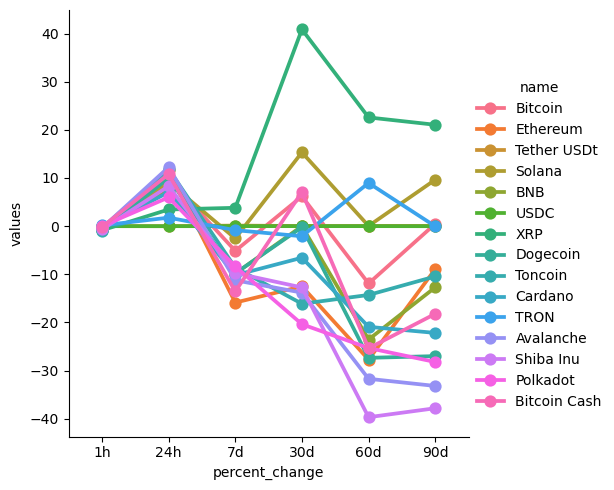

In [71]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [73]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query('name == "Bitcoin"')
df8['time'] = df8['timestamp'].dt.strftime('%H:%M:%S')
df8

,name,quote.USD.price,timestamp,time
0,Bitcoin,61245.33050,2024-08-08 21:24:50.987425,21:24:50
0,Bitcoin,61245.33050,2024-08-08 21:25:10.442368,21:25:10
0,Bitcoin,61284.91759,2024-08-08 21:26:10.719439,21:26:10
0,Bitcoin,61275.65287,2024-08-08 21:27:10.914365,21:27:10
0,Bitcoin,61296.55178,2024-08-08 21:28:11.162537,21:28:11
0,Bitcoin,61274.94856,2024-08-08 21:29:11.366619,21:29:11
0,Bitcoin,61274.94856,2024-08-08 21:30:11.577322,21:30:11
0,Bitcoin,61264.91157,2024-08-08 21:31:11.850988,21:31:11
0,Bitcoin,61264.91157,2024-08-08 21:32:12.083779,21:32:12
0,Bitcoin,61264.91157,2024-08-08 21:33:12.328526,21:33:12


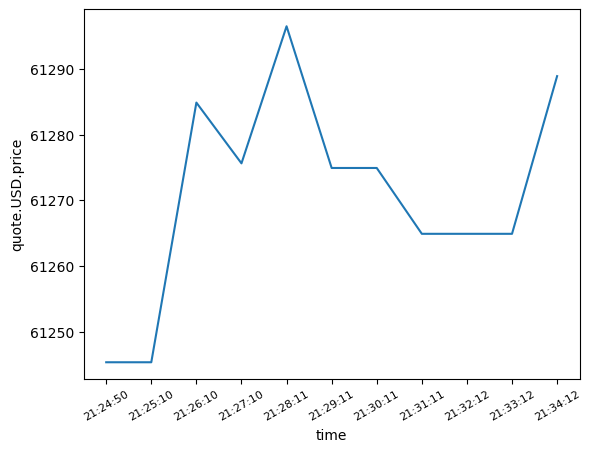

In [65]:
sns.lineplot(x='time', y='quote.USD.price', data = df8)
plt.xticks(fontsize=8, rotation=30);